In [292]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from pandas.io.json import json_normalize

In [179]:
cliente = pymongo.MongoClient()

In [180]:
cliente.list_database_names()

['admin', 'companies', 'config', 'local']

In [181]:

db = cliente.companies
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'companies')

In [182]:
db.collection_names()

<ipython-input-182-8ff4d2505e25>:1: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  db.collection_names()


['collection', 'o', 'companies']

In [183]:
len(list(db.collection.find()))

18801

In [184]:


l  = list(db.collection.find(
    { },
    {'category_code':  1}
))


In [185]:
df = pd.DataFrame(l)
df

,_id,category_code
0,52cdef7c4bab8bd675297d8a,web
1,52cdef7c4bab8bd675297d8b,enterprise
2,52cdef7c4bab8bd675297d8c,software
3,52cdef7c4bab8bd675297d8d,news
4,52cdef7c4bab8bd675297d8e,social
...,...,...
18796,52cdef7f4bab8bd67529c6f6,advertising
18797,52cdef7f4bab8bd67529c6f7,software
18798,52cdef7f4bab8bd67529c6f8,web
18799,52cdef7f4bab8bd67529c6f9,software


C:\Users\cyn_n\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning: The handle <BarContainer object of 41 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


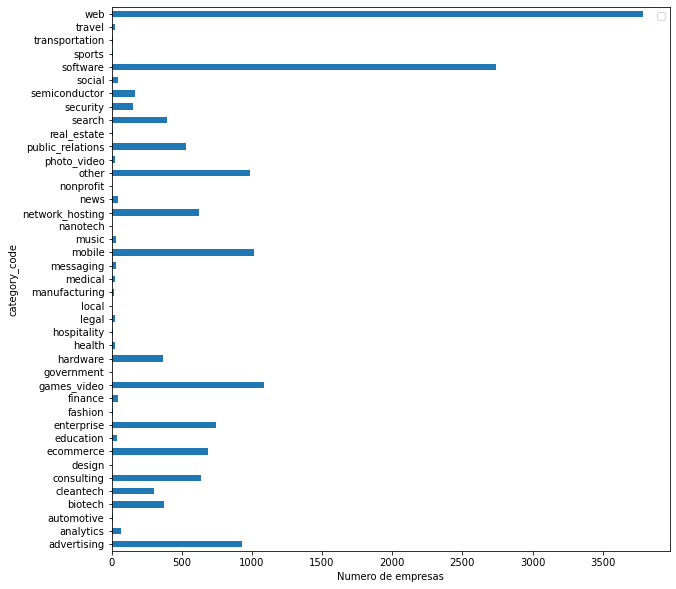

42

In [251]:
#f.groupby(df['category_code'])[df['category_code']].count()
vehicles_mean1 = df.groupby(["category_code"]).agg("count")
fig = vehicles_mean.plot.barh(figsize=(10,10))
fig.set_xlabel('Numero de empresas')
plt.show()
len(vehicles_mean1)

In [188]:
diez = vehicles_mean.sort_values(by='_id', ascending=False)
d = diez[:17]
d1 = diez[17:]
d1

,_id
category_code,
analytics,66
finance,49
social,49
news,48
education,36
music,33
messaging,30
travel,25
medical,25


C:\Users\cyn_n\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning: The handle <BarContainer object of 17 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


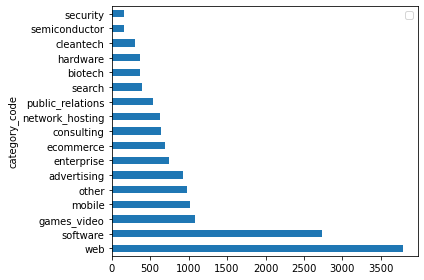

C:\Users\cyn_n\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning: The handle <BarContainer object of 24 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


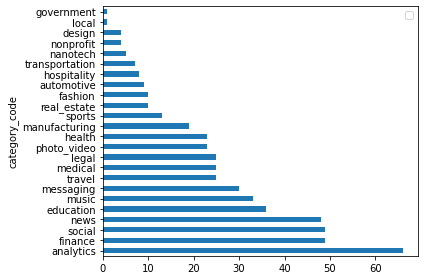

In [189]:
 d = pd.DataFrame(d)
    
    
d.plot.barh()
plt.tight_layout()
plt.show()

d1.plot.barh()
plt.tight_layout()
plt.show()



In [190]:

var = list(db.collection.find(
    { },
    {  'name': 1,'number_of_employees': 1, 'founded_year': 1, '_id': 0 ,'category_code':1,'description':1,'total_money_raised':1,'deadpooled_year':1}
))

In [191]:
df = pd.DataFrame(var)
df

,name,category_code,number_of_employees,founded_year,deadpooled_year,description,total_money_raised
0,Wetpaint,web,47.0,2005.0,1.0,Technology Platform Company,$39.8M
1,AdventNet,enterprise,600.0,1996.0,2.0,Server Management Software,$0
2,Zoho,software,1600.0,2005.0,3.0,Online Business Apps Suite,$0
3,Digg,news,60.0,2004.0,NaN,user driven social content website,$45M
4,Facebook,social,5299.0,2004.0,NaN,Social network,$2.43B
...,...,...,...,...,...,...,...
18796,Adhunk,advertising,3.0,2009.0,NaN,Online Admanager,$0
18797,AfterLogic,software,NaN,2002.0,NaN,.NET Email Components and Webmail,$0
18798,goBookmaker,web,NaN,NaN,NaN,Create your own sportsbook,$0
18799,EnteGreat Solutions,software,NaN,NaN,NaN,,$0


In [192]:
df = df.fillna(0)

In [193]:
df['Dead'] = np.where(df['deadpooled_year'] !=0, 1,0)

In [197]:
df
f =df.copy()

In [249]:
d3 = df[df['Dead'] == 1 ]

n = d3.groupby(["category_code"]).agg("count")
n
mylabels = list(n.index) 
y =n['Dead']


In [250]:
result1 = pd.merge(y, vehicles_mean1,on ='category_code', how="left")
result1   
result1['Proporcion Dead'] = result1['Dead'] /result1['_id']
result1.fillna(0)
rsor = result1.sort_values(by='Proporcion Dead', ascending=False)
rsor

,Dead,_id,Proporcion Dead
category_code,,,
legal,3,25.0,0.120000
automotive,1,9.0,0.111111
games_video,99,1083.0,0.091413
web,324,3787.0,0.085556
cleantech,24,305.0,0.078689
sports,1,13.0,0.076923
mobile,72,1018.0,0.070727
network_hosting,44,626.0,0.070288
hardware,24,368.0,0.065217


In [246]:
mylabels = list(result1.index) 
yy =result1['Proporcion Dead']
mylabels = mylabels[1:]
yy = yy[1:]

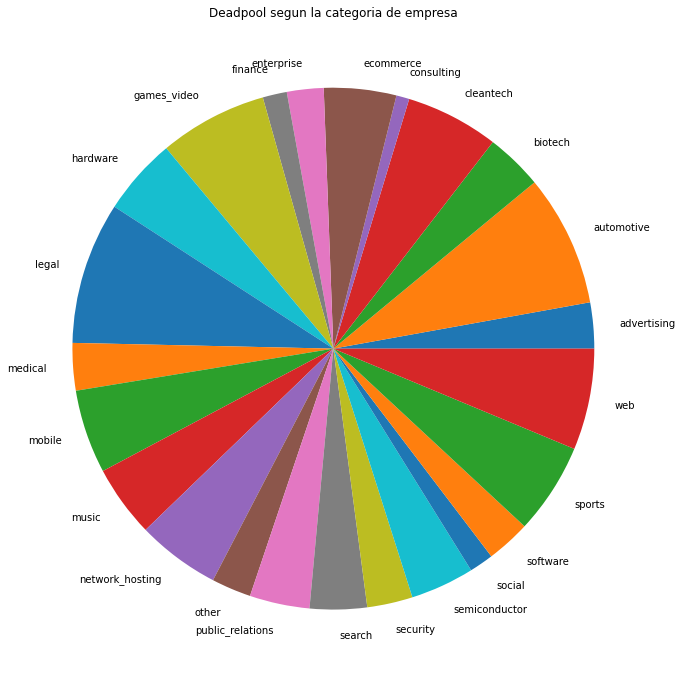

In [247]:
plt.figure(figsize=(12,12))
plt.pie(yy, labels = mylabels)
plt.title("Deadpool segun la categoria de empresa")

plt.show()

In [ ]:
 # De las 42 tipos de empresas displonibles la que tiene mayor numero de misma categoria es la wev, la que ha tenido mayor tiendas
# muertos es la categoria legal la automotriz, la game, y la web. Quien ha tenido menod Deadpool ha sido la de finansas
# consultoras. De las 17 empresas mcon menos numero en la categoria se encuentra la de finanzas.


In [254]:
df_size = df.sort_values(by='number_of_employees', ascending=False)
df_size

,name,category_code,number_of_employees,founded_year,deadpooled_year,description,total_money_raised,Dead
5776,Siemens,hardware,405000.0,1847.0,0.0,Electronics and Electrical Engineering,$8.9M,0
2016,IBM,software,388000.0,1896.0,0.0,,$0,0
8105,Toyota,enterprise,320000.0,1933.0,0.0,Automotive,$0,0
255,PayPal,finance,300000.0,1998.0,0.0,Internet payment service,$197M,0
13172,Nippon Telegraph and Telephone Corporation,0,227000.0,1985.0,0.0,,$0,0
...,...,...,...,...,...,...,...,...
10377,teambits,software,0.0,2008.0,0.0,Collaboration and Interactive Software,$0,0
10378,PG Job Site Pro,software,0.0,2008.0,0.0,0,$0,0
2725,Logix,0,0.0,0.0,0.0,0,$0,0
10383,QOOP,ecommerce,0.0,0.0,0.0,0,$0,0


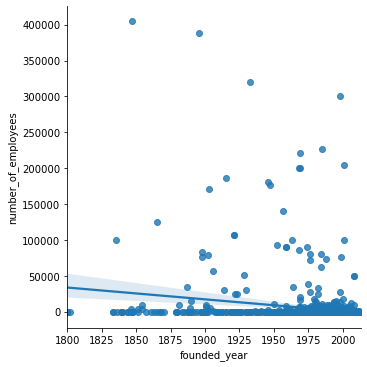

In [262]:
ds = df_size.copy()
#ds = ds.drop(df[df['number_of_employees']==0].index)
ds = ds.drop(df[df['founded_year']==0].index)
#your code-1st way
sns.lmplot(x='founded_year',y='number_of_employees', data=ds,fit_reg=True) 
plt.show()

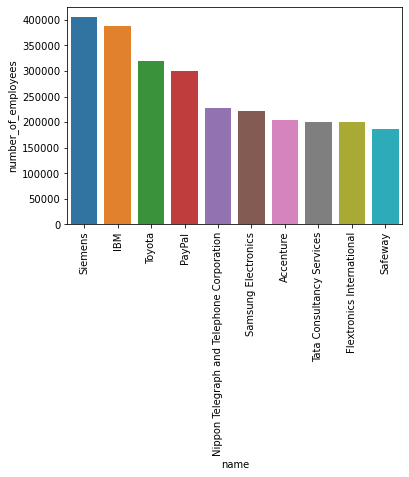

In [267]:
 
ax = sns.barplot(x='name',y='number_of_employees', data=ds[:10])

plt.xticks(rotation=90)
plt.show()

In [275]:
cat_founded = ds[13100:]
ds = cat_founded.drop(cat_founded[cat_founded['category_code']==0].index)

In [283]:
ds['Money_raised'] =   np.where(ds['total_money_raised'] !='$0', 1,0)

In [284]:
ds

,name,category_code,number_of_employees,founded_year,deadpooled_year,description,total_money_raised,Dead,Money_raised
2738,RealMatch,advertising,0.0,2004.0,0.0,Recruitment Ad Networks,$11.7M,0,1
2746,Messagenet,mobile,0.0,1995.0,0.0,SMS messaging solutions,$0,0,0
2754,blogads,web,0.0,2002.0,0.0,Blog Advertising,$0,0,0
10288,CrownPeak,software,0.0,2001.0,0.0,content management,$10.3M,0,1
10292,Refinery29,fashion,0.0,2004.0,0.0,,$30.4M,0,1
10294,OwnerIQ,advertising,0.0,2006.0,0.0,Path-to-purchase media,$28.3M,0,1
10301,Air2Web,mobile,0.0,1999.0,0.0,mobile to web platform,$25M,0,1
10303,Matter Network,cleantech,0.0,2008.0,0.0,CleanTech Media Company,$0,0,0
10313,Sprout - Growing Ideas,other,0.0,1999.0,0.0,,$0,0,0
10304,Ridespring,software,0.0,2005.0,0.0,Corporate SaaS Commute Program,$0,0,0


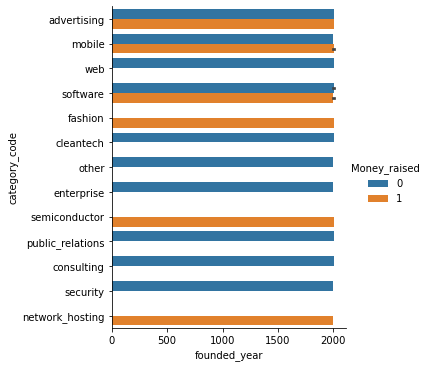

In [287]:
ds
g = sns.catplot( x="founded_year",y="category_code",
                hue="Money_raised", 
                data=ds, kind="bar",
            );



In [296]:

d_o = list(db.collection.find(
    { },
    {  'name': 1,'number_of_employees': 1, 'founded_year': 1, '_id': 0 ,'category_code':1,'description':1,'total_money_raised':1,'deadpooled_year':1,'offices': 1}
))

In [295]:
json_normalize(d_o['offices'][0])

TypeError: list indices must be integers or slices, not str